Bounds on c_H: [-38.00647762575186, 1.6524555489457335]
Bounds on c_W: [-82.23095954936447, 43.53403740848707]
Bounds on c_B: [33.859806873267715, 4.837115267609676]
Bounds on c_HW: [-733.2927610948142, 733.2927610948142]
Bounds on c_HB: [-1222.1546018246904, 488.8618407298761]


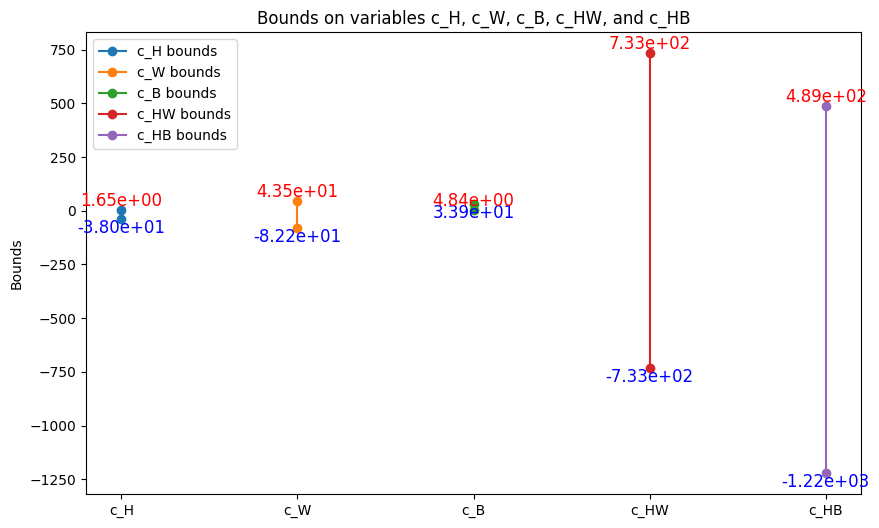

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
v = 246
f = 1000
M_W = 80.377
m_pho = 2500
pi = np.pi

# Given bounds
c_H_Bar_bounds = [-2.3, 0.1]
c_WB_Plus_Bar_bounds = [-0.05, 0.05]
c_WB_Minus_Bar_bounds = [-0.12, 0.04]
c_HW_Bar_bounds = [-0.03, 0.03]
c_HB_Bar_bounds = [-0.05, 0.02]

# Bounds calculations based on the relations

# For c_H
c_H_min = c_H_Bar_bounds[0] * (f**2 / v**2)
c_H_max = c_H_Bar_bounds[1] * (f**2 / v**2)

# For c_W and c_B (solving from the sum and difference equations)
c_WB_plus_min = c_WB_Plus_Bar_bounds[0] * (m_pho**2 / M_W**2)
c_WB_plus_max = c_WB_Plus_Bar_bounds[1] * (m_pho**2 / M_W**2)

c_WB_minus_min = c_WB_Minus_Bar_bounds[0] * (m_pho**2 / M_W**2)
c_WB_minus_max = c_WB_Minus_Bar_bounds[1] * (m_pho**2 / M_W**2)

# Solving for c_W and c_B
c_W_min = (c_WB_plus_min + c_WB_minus_min) / 2
c_W_max = (c_WB_plus_max + c_WB_minus_max) / 2
c_B_min = (c_WB_plus_min - c_WB_minus_min) / 2
c_B_max = (c_WB_plus_max - c_WB_minus_max) / 2

# For c_HW
c_HW_min = c_HW_Bar_bounds[0] * (16 * pi**2 * f**2 / M_W**2)
c_HW_max = c_HW_Bar_bounds[1] * (16 * pi**2 * f**2 / M_W**2)

# For c_HB
c_HB_min = c_HB_Bar_bounds[0] * (16 * pi**2 * f**2 / M_W**2)
c_HB_max = c_HB_Bar_bounds[1] * (16 * pi**2 * f**2 / M_W**2)

# Print the calculated bounds
print(f"Bounds on c_H: [{c_H_min}, {c_H_max}]")
print(f"Bounds on c_W: [{c_W_min}, {c_W_max}]")
print(f"Bounds on c_B: [{c_B_min}, {c_B_max}]")
print(f"Bounds on c_HW: [{c_HW_min}, {c_HW_max}]")
print(f"Bounds on c_HB: [{c_HB_min}, {c_HB_max}]")

# Plot the bounds
variables = ['c_H', 'c_W', 'c_B', 'c_HW', 'c_HB']
lower_bounds = [c_H_min, c_W_min, c_B_min, c_HW_min, c_HB_min]
upper_bounds = [c_H_max, c_W_max, c_B_max, c_HW_max, c_HB_max]

plt.figure(figsize=(10, 6))
for i, var in enumerate(variables):
    plt.plot([i, i], [lower_bounds[i], upper_bounds[i]], marker='o', label=f'{var} bounds')
    plt.text(i, lower_bounds[i], f'{lower_bounds[i]:.2e}', ha='center', va='top', fontsize=12, color='blue')
    plt.text(i, upper_bounds[i], f'{upper_bounds[i]:.2e}', ha='center', va='bottom', fontsize=12, color='red')

plt.xticks(range(len(variables)), variables)
plt.ylabel("Bounds")
plt.title("Bounds on variables c_H, c_W, c_B, c_HW, and c_HB")
plt.grid(False)
plt.legend()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
s_theta_square = 0.22305
c_theta_square = 0.77695
m_pho = 2500
f = 1000
pi = np.pi

# Bounds
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_W': [-82.23095954936447, 43.53403740848707],
    'c_B': [4.837115267609676, 33.859806873267715],  # Adjusted the order
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}

# Create sliders for each variable with proper min and max
c_H_slider = widgets.FloatSlider(value=np.mean(bounds['c_H']), min=bounds['c_H'][0], max=bounds['c_H'][1], description='c_H')
c_W_slider = widgets.FloatSlider(value=np.mean(bounds['c_W']), min=bounds['c_W'][0], max=bounds['c_W'][1], description='c_W')
c_B_slider = widgets.FloatSlider(value=np.mean(bounds['c_B']), min=bounds['c_B'][0], max=bounds['c_B'][1], description='c_B')
c_HW_slider = widgets.FloatSlider(value=np.mean(bounds['c_HW']), min=bounds['c_HW'][0], max=bounds['c_HW'][1], description='c_HW')
c_HB_slider = widgets.FloatSlider(value=np.mean(bounds['c_HB']), min=bounds['c_HB'][0], max=bounds['c_HB'][1], description='c_HB')

# Function to update the plot based on slider values
def update_plot(c_H, c_W, c_B, c_HW, c_HB):
    # Calculate c2Z, c3Z, c4Z, c5Z based on the current slider values
    c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
    c3Z = 0  # As given
    c4Z = c5Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                      s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
    
    # Clear previous plots
    plt.clf()
    plt.scatter(c2Z, c4Z, label='c2Z vs c4Z', color='blue', s=100)
    plt.scatter(c2Z, c5Z, label='c2Z vs c5Z', color='orange', s=100)
    plt.title('Relations between c2Z, c4Z, and c5Z')
    plt.xlabel('c2Z')
    plt.ylabel('c4Z and c5Z')
    plt.axhline(0, color='grey', linestyle='--', lw=0.8)
    plt.axvline(0, color='grey', linestyle='--', lw=0.8)
    plt.legend()
    plt.grid()
    plt.xlim(-1000, 1000)  # Adjust based on expected range
    plt.ylim(-1000, 1000)  # Adjust based on expected range
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, 
                                        c_H=c_H_slider, 
                                        c_W=c_W_slider, 
                                        c_B=c_B_slider, 
                                        c_HW=c_HW_slider, 
                                        c_HB=c_HB_slider)

# Display the sliders and interactive plot
display(interactive_plot)

# Display bounds
print("Bounds:")
for key, value in bounds.items():
    print(f"{key}: {value}")


interactive(children=(FloatSlider(value=-18.177011038403066, description='c_H', max=1.6524555489457335, min=-3…

Bounds:
c_H: [-38.00647762575186, 1.6524555489457335]
c_W: [-82.23095954936447, 43.53403740848707]
c_B: [4.837115267609676, 33.859806873267715]
c_HW: [-733.2927610948142, 733.2927610948142]
c_HB: [-1222.1546018246904, 488.8618407298761]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
s_theta_square = 0.22305
c_theta_square = 0.77695
m_pho = 2500
f = 1000
pi = np.pi

# Bounds
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_W': [-82.23095954936447, 43.53403740848707],
    'c_B': [4.837115267609676, 33.859806873267715],  # Adjusted the order
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}

# Create sliders for each variable with proper min and max
c_H_slider = widgets.FloatSlider(value=np.mean(bounds['c_H']), min=bounds['c_H'][0], max=bounds['c_H'][1], description='c_H')
c_W_slider = widgets.FloatSlider(value=np.mean(bounds['c_W']), min=bounds['c_W'][0], max=bounds['c_W'][1], description='c_W')
c_B_slider = widgets.FloatSlider(value=np.mean(bounds['c_B']), min=bounds['c_B'][0], max=bounds['c_B'][1], description='c_B')
c_HW_slider = widgets.FloatSlider(value=np.mean(bounds['c_HW']), min=bounds['c_HW'][0], max=bounds['c_HW'][1], description='c_HW')
c_HB_slider = widgets.FloatSlider(value=np.mean(bounds['c_HB']), min=bounds['c_HB'][0], max=bounds['c_HB'][1], description='c_HB')

# Function to update the plot based on slider values
def update_plot(c_H, c_W, c_B, c_HW, c_HB):
    # Calculate c2Z, c3Z, c4Z, c5Z based on the current slider values
    c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
    c3Z = 0  # As given
    c4Z = c5Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                      s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
    
    # Clear previous plots
    plt.clf()
    plt.scatter(c2Z, c4Z, label='c2Z vs c4Z', color='blue', s=100)
    plt.scatter(c2Z, c5Z, label='c2Z vs c5Z', color='orange', s=100)

    # Annotate the coordinates
    plt.annotate(f'c2Z: {c2Z:.2f}\nc4Z: {c4Z:.2f}', 
                 xy=(c2Z, c4Z), 
                 xytext=(5, 5), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=10, 
                 color='blue')
    
    plt.annotate(f'c2Z: {c2Z:.2f}\nc5Z: {c5Z:.2f}', 
                 xy=(c2Z, c5Z), 
                 xytext=(5, -15), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='->', color='orange'),
                 fontsize=10, 
                 color='orange')

    plt.title('Relations between c2Z, c4Z, and c5Z')
    plt.xlabel('c2Z')
    plt.ylabel('c4Z and c5Z')
    plt.axhline(0, color='grey', linestyle='--', lw=0.8)
    plt.axvline(0, color='grey', linestyle='--', lw=0.8)
    plt.legend()
    plt.grid()
    plt.xlim(-1000, 1000)  # Adjust based on expected range
    plt.ylim(-1000, 1000)  # Adjust based on expected range
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, 
                                        c_H=c_H_slider, 
                                        c_W=c_W_slider, 
                                        c_B=c_B_slider, 
                                        c_HW=c_HW_slider, 
                                        c_HB=c_HB_slider)

# Display the sliders and interactive plot
display(interactive_plot)

# Display bounds
print("Bounds:")
for key, value in bounds.items():
    print(f"{key}: {value}")


interactive(children=(FloatSlider(value=-18.177011038403066, description='c_H', max=1.6524555489457335, min=-3…

Bounds:
c_H: [-38.00647762575186, 1.6524555489457335]
c_W: [-82.23095954936447, 43.53403740848707]
c_B: [4.837115267609676, 33.859806873267715]
c_HW: [-733.2927610948142, 733.2927610948142]
c_HB: [-1222.1546018246904, 488.8618407298761]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Constants
s_theta_square = 0.22305
c_theta_square = 0.77695
m_pho = 2500
f = 1000
pi = np.pi

# Bounds
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_W': [-82.23095954936447, 43.53403740848707],
    'c_B': [4.837115267609676, 33.859806873267715],  # Adjusted the order
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}

# Create sliders for each variable with proper min and max
c_H_slider = widgets.FloatSlider(value=np.mean(bounds['c_H']), min=bounds['c_H'][0], max=bounds['c_H'][1], description='c_H')
c_W_slider = widgets.FloatSlider(value=np.mean(bounds['c_W']), min=bounds['c_W'][0], max=bounds['c_W'][1], description='c_W')
c_B_slider = widgets.FloatSlider(value=np.mean(bounds['c_B']), min=bounds['c_B'][0], max=bounds['c_B'][1], description='c_B')
c_HW_slider = widgets.FloatSlider(value=np.mean(bounds['c_HW']), min=bounds['c_HW'][0], max=bounds['c_HW'][1], description='c_HW')
c_HB_slider = widgets.FloatSlider(value=np.mean(bounds['c_HB']), min=bounds['c_HB'][0], max=bounds['c_HB'][1], description='c_HB')

# Function to update the plot based on slider values
def update_plot(c_H, c_W, c_B, c_HW, c_HB):
    # Calculate c2Z, c3Z, c4Z, c5Z based on the current slider values
    c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
    c3Z = 0  # As given
    c4Z = c5Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                      s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
    
    # Clear previous plots
    plt.clf()
    plt.scatter(c2Z, c4Z, label='c2Z vs c4Z', color='blue', s=50)  # Smaller point size
    plt.scatter(c2Z, c5Z, label='c2Z vs c5Z', color='orange', s=50)  # Smaller point size

    # Annotate the coordinates for c2Z once
    plt.annotate(f'c2Z: {c2Z:.2f}', 
                 xy=(c2Z, c4Z), 
                 xytext=(5, 5), 
                 textcoords='offset points', 
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=10, 
                 color='blue')

    # Annotate c4Z and c5Z
    plt.annotate(f'c4Z: {c4Z:.2f}', 
                 xy=(c2Z, c4Z), 
                 xytext=(5, -15), 
                 textcoords='offset points', 
                 fontsize=10, 
                 color='blue')
    
    plt.annotate(f'c5Z: {c5Z:.2f}', 
                 xy=(c2Z, c5Z), 
                 xytext=(5, -15), 
                 textcoords='offset points', 
                 fontsize=10, 
                 color='orange')

    plt.title('Relations between c2Z, c4Z, and c5Z')
    plt.xlabel('c2Z')
    plt.ylabel('c4Z and c5Z')
    plt.axhline(0, color='grey', linestyle='--', lw=0.8)
    plt.axvline(0, color='grey', linestyle='--', lw=0.8)
    plt.legend()
    plt.grid()
    plt.xlim(-1000, 1000)  # Adjust based on expected range
    plt.ylim(-1000, 1000)  # Adjust based on expected range
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, 
                                        c_H=c_H_slider, 
                                        c_W=c_W_slider, 
                                        c_B=c_B_slider, 
                                        c_HW=c_HW_slider, 
                                        c_HB=c_HB_slider)

# Display the sliders and interactive plot
display(interactive_plot)

# Display bounds
print("Bounds:")
for key, value in bounds.items():
    print(f"{key}: {value}")


interactive(children=(FloatSlider(value=-18.177011038403066, description='c_H', max=1.6524555489457335, min=-3…

Bounds:
c_H: [-38.00647762575186, 1.6524555489457335]
c_W: [-82.23095954936447, 43.53403740848707]
c_B: [4.837115267609676, 33.859806873267715]
c_HW: [-733.2927610948142, 733.2927610948142]
c_HB: [-1222.1546018246904, 488.8618407298761]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from tqdm import tqdm

# Constants
s_theta_square = 0.22305
c_theta_square = 0.77695
m_pho = 2500
f = 1000
pi = np.pi

# Bounds
bounds = {
    'c_H': [-38.00647762575186, 1.6524555489457335],
    'c_W': [-82.23095954936447, 43.53403740848707],
    'c_B': [4.837115267609676, 33.859806873267715],
    'c_HW': [-733.2927610948142, 733.2927610948142],
    'c_HB': [-1222.1546018246904, 488.8618407298761],
}

# Create sliders for each variable
c_H_slider = widgets.FloatSlider(value=np.mean(bounds['c_H']), min=bounds['c_H'][0], max=bounds['c_H'][1], description='c_H')
c_W_slider = widgets.FloatSlider(value=np.mean(bounds['c_W']), min=bounds['c_W'][0], max=bounds['c_W'][1], description='c_W')
c_B_slider = widgets.FloatSlider(value=np.mean(bounds['c_B']), min=bounds['c_B'][0], max=bounds['c_B'][1], description='c_B')
c_HW_slider = widgets.FloatSlider(value=np.mean(bounds['c_HW']), min=bounds['c_HW'][0], max=bounds['c_HW'][1], description='c_HW')
c_HB_slider = widgets.FloatSlider(value=np.mean(bounds['c_HB']), min=bounds['c_HB'][0], max=bounds['c_HB'][1], description='c_HB')

# Create grid for contour plotting
c_H_values = np.linspace(bounds['c_H'][0], bounds['c_H'][1], 50)  # Reduced number of points
c_W_values = np.linspace(bounds['c_W'][0], bounds['c_W'][1], 50)
c_B_values = np.linspace(bounds['c_B'][0], bounds['c_B'][1], 50)
c_HW_values = np.linspace(bounds['c_HW'][0], bounds['c_HW'][1], 50)
c_HB_values = np.linspace(bounds['c_HB'][0], bounds['c_HB'][1], 50)

# Function to calculate c2Z and c4Z on-the-fly
def calculate_contour_values():
    c2Z_vals = []
    c4Z_vals = []
    for c_H in tqdm(c_H_values, desc="Processing c_H values"):
        for c_W in c_W_values:
            for c_B in c_B_values:
                for c_HW in c_HW_values:
                    for c_HB in c_HB_values:
                        c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
                        c4Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                                          s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))
                        c2Z_vals.append(c2Z)
                        c4Z_vals.append(c4Z)
    return np.array(c2Z_vals).reshape((50, 50)), np.array(c4Z_vals).reshape((50, 50))

c2Z_vals, c4Z_vals = calculate_contour_values()

# Function to update the plot based on slider values
def update_plot(c_H, c_W, c_B, c_HW, c_HB):
    c2Z = 2 * (c_theta_square * c_HW + s_theta_square * c_HB) * (m_pho / (4 * pi * f)) ** 2
    c4Z = -1 * (c_theta_square * (c_W + c_HW * (m_pho / (4 * pi * f)) ** 2) +
                  s_theta_square * (c_B + c_HB * (m_pho / (4 * pi * f)) ** 2))

    plt.clf()
    contour = plt.contourf(c2Z_vals, c4Z_vals, levels=50, cmap='viridis', alpha=0.7)
    plt.colorbar(contour, label='Allowed Region')
    
    plt.scatter(c2Z, c4Z, label='Current Point', color='red', s=20)
    plt.annotate(f'c2Z: {c2Z:.2f}', xy=(c2Z, c4Z), xytext=(5, 5), textcoords='offset points', 
                 arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, color='blue')
    plt.annotate(f'c4Z: {c4Z:.2f}', xy=(c2Z, c4Z), xytext=(5, -15), textcoords='offset points', fontsize=10, color='blue')
    
    plt.title('Allowed Region for c2Z vs c4Z')
    plt.xlabel('c2Z')
    plt.ylabel('c4Z')
    plt.axhline(0, color='grey', linestyle='--', lw=0.8)
    plt.axvline(0, color='grey', linestyle='--', lw=0.8)
    plt.grid()
    plt.legend()
    plt.show()

# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, 
                                        c_H=c_H_slider, 
                                        c_W=c_W_slider, 
                                        c_B=c_B_slider, 
                                        c_HW=c_HW_slider, 
                                        c_HB=c_HB_slider)

# Display the sliders and interactive plot
display(interactive_plot)

# Display bounds
print("Bounds:")
for key, value in bounds.items():
    print(f"{key}: {value}")


Processing c_H values:  12%|█▏        | 6/50 [00:59<07:12,  9.83s/it]


KeyboardInterrupt: 